This code should be run on data that has been obtained from the IPAC forced photometry pipeline

In [1]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = "IC190730A_forced.txt"

In [3]:
file_path = os.path.join(Path().absolute(), "forced_photometry")
file_path = os.path.join(file_path, file_name)
print(file_path)

parsed_data = []

with open(file_path, "r") as f:
    for line in f:
        if line[0] not in ["#"]:
            # Remove /n
            line = line[:-1]
            parsed_line = [x for x in line.split(" ") if x != ""]
            
            if parsed_line [0] not in ["index,"]:
                parsed_data.append(tuple(parsed_line[:6] + parsed_line[15:18] + parsed_line[23:28]
                                         + parsed_line[32:33] + parsed_line[34:38] + parsed_line[39:46]
                                         + parsed_line[47:50] + parsed_line[52:]))
            

            
parsed_data = np.array(parsed_data, dtype=np.dtype([
    ("index", np.int),
    ("field", np.int),
    ("ccdid", np.int),
    ("qid", np.int),
    ("filter", "S100"),
    ("pid", np.int),
    ("scimaglim", np.float),
    ("zpmaginpsci", np.float),
    ("zpmaginpsciunc", np.float),
    ("diffmaglim", np.float),
    ("zpdiff", np.float),
    ("programid", np.int),
    ("obsdate", "S100"),
    ("jd", np.float),
    ("refmaglim", np.float),
    ("zpref", np.float),
    ("refcreated", "S100"),
    ("refjdstart", np.float),
    ("refjdend", np.float),
    ("forcediffimflux", np.float),
    ("forcediffimfluxunc", np.float),
    ("forcediffimsnr", np.float),
    ("forcediffimchisq", np.float),
    ("forcediffimfluxap", np.float),
    ("forcediffimfluxuncap", np.float),
    ("forcediffimsnrap", np.float),
    ("dnearestrefsrc", np.float),
    ("nearestrefmag", np.float),
    ("nearestrefmagunc", np.float),
    ("procstatus", np.int)
]))

/Users/avocado/ZTF_Neutrino_ToO/forced_photometry/IC190730A_forced.txt


/Users/avocado/anaconda2/envs/ztf_too_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/Users/avocado/anaconda2/envs/ztf_too_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


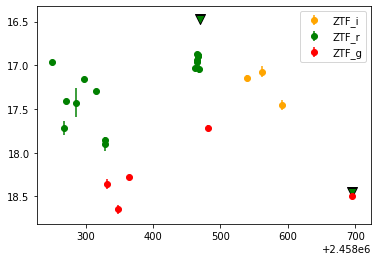

In [10]:
snt = 3
snu = 5

plt.figure()

for j, band in enumerate(list(set(parsed_data["filter"]))):
    data = parsed_data[parsed_data["filter"] == band]
    
    nrf = 10**(0.4*(data["zpdiff"] - data["nearestrefmag"]))
    nrfu = data["nearestrefmagunc"] * nrf/ 1.0857
    
    flux_tot = data["forcediffimflux"] + nrf
    flux_tot_unc = (data["forcediffimfluxunc"]**2 - nrfu**2)**0.5
    
    snr = flux_tot / flux_tot_unc
    
    mag = data["zpdiff"] - 2.5 * np.log10(flux_tot)
    unc = 1.0857 / snr
    
    uls = data["zpdiff"] - 2.5 * np.log10(snu * flux_tot_unc)
    
    mask = snr > snt
        
    plt.errorbar(data["jd"][mask], mag[mask], marker="o", label=band.decode(), color=["orange", "g", "r"][j], yerr=unc[mask], ls='none')
    plt.scatter(data["jd"][~mask], uls[~mask], marker="v", color="k", s=100)
    plt.scatter(data["jd"][~mask], uls[~mask], marker="v", color=["orange", "g", "r"][j])

plt.gca().invert_yaxis()
plt.legend()
    
#     print(data)